In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
file_path = "Book4.xlsx"
df = pd.read_excel(file_path)


In [5]:
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['TIMESLOT'].astype(str), format='mixed')
df.set_index('DateTime', inplace=True)

In [6]:
df.drop(columns=['Date', 'TIMESLOT'], inplace=True, errors='ignore')

In [7]:
df.sort_index(inplace=True)
df.to_csv('out.csv')

In [9]:
start_test_date = "2024-06-07"
end_test_date = "2024-11-12"

In [10]:
train_df = df[df.index < start_test_date]
test_df = df[(df.index >= start_test_date) & (df.index <= end_test_date)]

In [ ]:
def fit_and_forecast_arima(train_series, test_series, arima_order=()):
    model = ARIMA(train_series, order=arima_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit()

    forecast_steps = len(test_series)
    forecast = model_fit.forecast(steps=forecast_steps)
    forecast.index = test_series.index
    return forecast

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['DELHI'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -22.949955
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


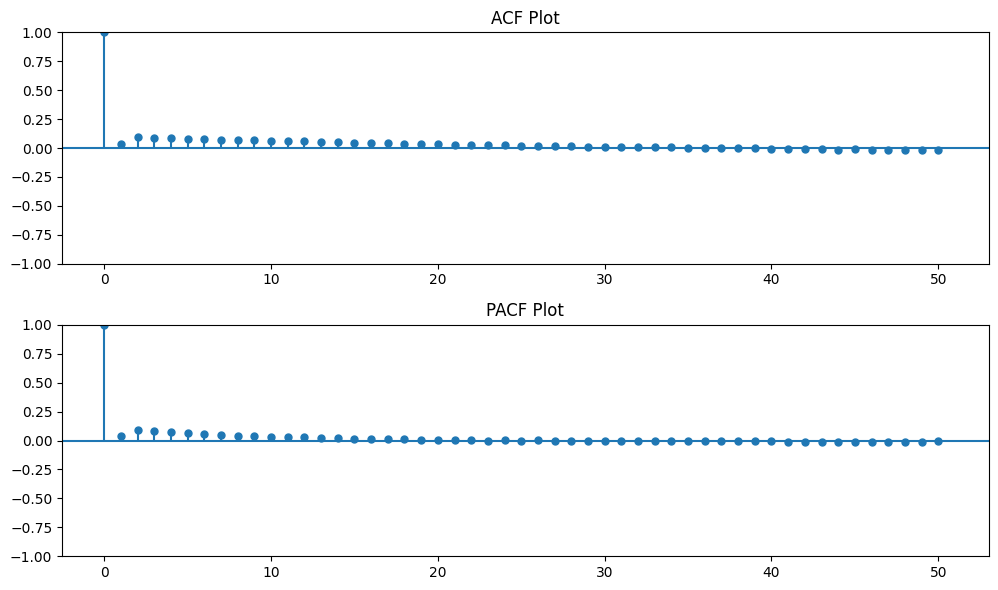

In [26]:
ts_diff = ts.diff().dropna()
plt.figure(figsize=(10, 6))
plt.subplot(211)
plot_acf(ts_diff, lags=50, ax=plt.gca())
plt.title('ACF Plot')
plt.subplot(212)
plot_pacf(ts_diff, lags=50, ax=plt.gca())
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

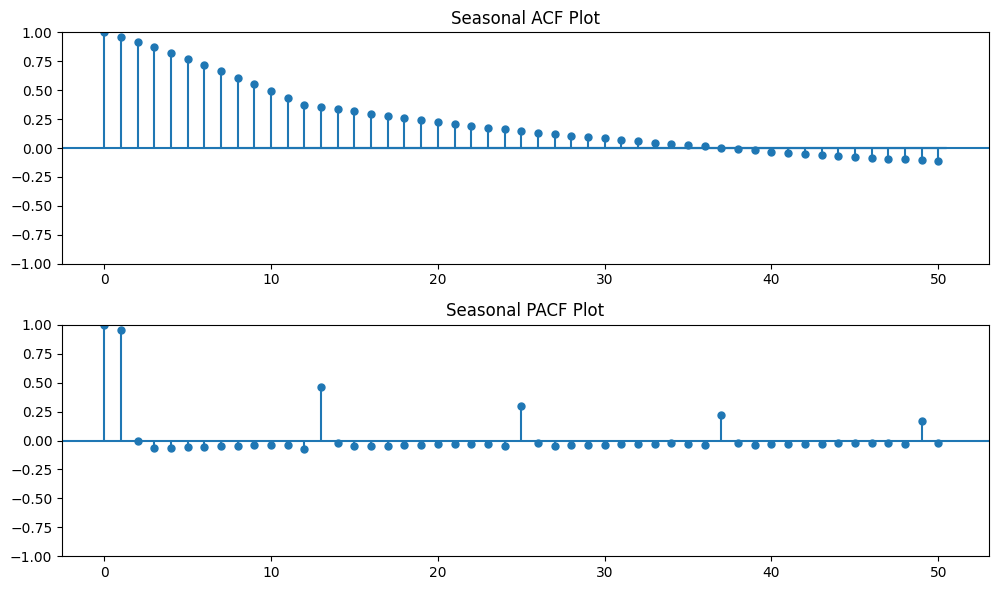

In [28]:
seasonal_diff = ts.diff(12).dropna()
plt.figure(figsize=(10, 6))
plt.subplot(211)
plot_acf(seasonal_diff, lags=50, ax=plt.gca())
plt.title('Seasonal ACF Plot')
plt.subplot(212)
plot_pacf(seasonal_diff, lags=50, ax=plt.gca())
plt.title('Seasonal PACF Plot')
plt.tight_layout()
plt.show()

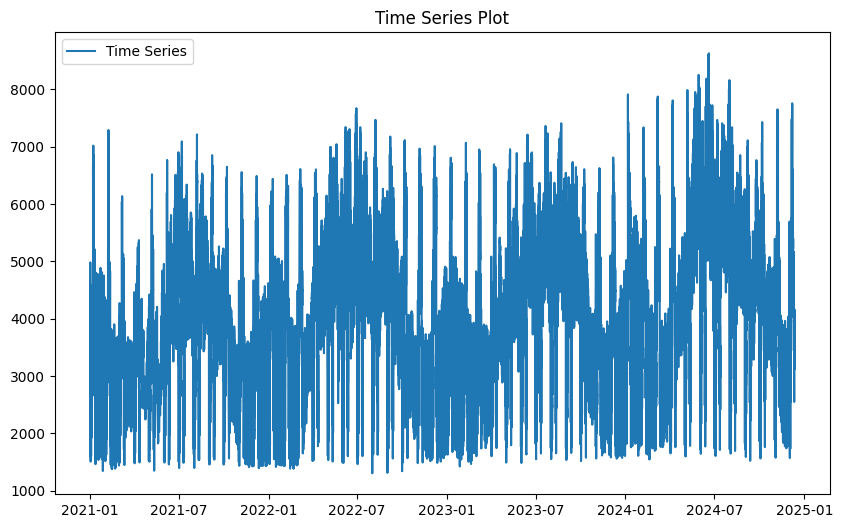

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Time Series')
plt.title('Time Series Plot')
plt.legend()
plt.show()

In [48]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

ts = df['DELHI'].dropna()  # Ensure no missing values
df = df.asfreq('5min')

# Define parameter ranges
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
m = 12

non_seasonal_params = [(i, j, k) for i in p for j in d for k in q]
seasonal_params = [(i, j, k, m) for i in P for j in D for k in Q]

best_aic = np.inf
best_params = None
best_model = None

# Grid search
for param in non_seasonal_params:
    for seasonal_param in seasonal_params:
        try:
            print(f"Trying ARIMA{param} x Seasonal{seasonal_param}")
            model = SARIMAX(ts,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
                best_model = results
        except Exception as e:
            print(f"Model failed for {param} x {seasonal_param}: {e}")
            continue

# Output the best model and parameters
if best_params and best_model:
    print(f"Best Parameters: Non-Seasonal={best_params[0]}, Seasonal={best_params[1]}")
    print(f"Best AIC: {best_aic}")
    print(best_model.summary())
else:
    print("No suitable model found. Check data or parameter ranges.")


Trying ARIMA(0, 0, 0) x Seasonal(0, 0, 0, 12)


C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 0, 0) x Seasonal(0, 0, 1, 12)


C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [49]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

ts = df['DELHI'].dropna()  # Ensure no missing values
df = df.asfreq('5min')

# Define parameter ranges
p = d = q = range(0, 3)
P = D = Q = range(0, 3)
m = 12

non_seasonal_params = [(i, j, k) for i in p for j in d for k in q]
seasonal_params = [(i, j, k, m) for i in P for j in D for k in Q]

best_aic = np.inf
best_params = None
best_model = None

# Grid search
for param in non_seasonal_params:
    for seasonal_param in seasonal_params:
        try:
            print(f"Trying ARIMA{param} x Seasonal{seasonal_param}")
            model = SARIMAX(ts,
                            order=param,
                            seasonal_order=seasonal_param,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, seasonal_param)
                best_model = results
        except Exception as e:
            print(f"Model failed for {param} x {seasonal_param}: {e}")
            continue

# Output the best model and parameters
if best_params and best_model:
    print(f"Best Parameters: Non-Seasonal={best_params[0]}, Seasonal={best_params[1]}")
    print(f"Best AIC: {best_aic}")
    print(best_model.summary())
else:
    print("No suitable model found. Check data or parameter ranges.")


Trying ARIMA(0, 0, 0) x Seasonal(0, 0, 0, 12)


C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trying ARIMA(0, 0, 0) x Seasonal(0, 0, 1, 12)


C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Sanchit\AppData\Local\pypoetry\Cache\virtualenvs\sih2-Xq_45JKi-py3.13\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


KeyboardInterrupt: 